In [1]:
# from bs4 import BeautifulSoup
import requests
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(style='whitegrid')
sns.set(rc={"figure.figsize":(15, 10)})

Matplotlib is building the font cache; this may take a moment.


**Материалы Роскомсвободы о блокировках:**

- [Военной цензуре подверглось более 3000 сайтов](https://roskomsvoboda.org/post/voennaya-cenzura-3000-saytov/)
- [Военной цензурой накрыло более 5000 сайтов](https://roskomsvoboda.org/post/voen-cenzura-5300-saytov/)
- [Военной цензуре подверглось более 1500 сайтов](https://roskomsvoboda.org/post/ban-1500-ssylok/)


**Вопросы к материалу:**
- Чем блокировки сейчас отличаются от блокировок раньше?
- В блокировках присутствуют не только сайты политические или независимых медиа. Что это за сайты?
- Чем отличаются блокировки РКН, судов, ФНС, генпрокуратуры и т.д?
- Что произошло после 24 февраля?
- Скачок был и в прошлом году примерно в это же время? Что тогда произошло? Какая-то странная сезонность в блокировках.
- В абсолютных цифрах кол-во заблокированных сайтов увелиичилось не очень сильно, но при этом все независимые медиа заблокировано было именно в этом году. Что же блокировали в прошлые годы?

**scraping data**

In [ ]:
data = None
for page in tqdm(range(1, 10000)):
    url = f'https://reestr.rublacklist.net/?status=1&gov=all&paginate_by=500&page={page}'
    r = requests.get(url)
    if r.status_code == 404:
        print('404')
        break
    if data is None:
        data = pd.read_html(r.text)[0]
    else:
        try:
            data = pd.concat([data, pd.read_html(r.text)[0]])
        except Exception as e:
            print(e)

In [20]:
data.to_csv('scraped_blocking_data.csv')

In [ ]:
data.drop(['Unnamed: 0', 'Unnamed: 3'], axis=1, inplace=True)
data.columns = ['date', 'site', 'who_blocked', 'count_of_blocked_domains']

In [ ]:
data.date = pd.to_datetime(data.date)
data['year'] = data.date.dt.year
data['month'] = data.date.dt.month

In [ ]:
data.reset_index(inplace=True)
data.drop('index', axis=1, inplace=True)

**data analysis**

In [2]:
data = pd.read_csv('scraped_blocking_data.csv', index_col=0)

In [3]:
data.date = pd.to_datetime(data.date)

In [4]:
data.head()

,date,site,who_blocked,count_of_blocked_domains,year,month
0,2022-07-15,piratebayproxy.autos,Минкомсвязь,0,2022,7
1,2022-07-15,plan-a.guru,Генпрокуратура,0,2022,7
2,2022-07-15,nu15.kinovod.cam,Минкомсвязь,0,2022,7
3,2022-07-15,mega-pesni.one,Минкомсвязь,0,2022,7
4,2022-07-15,thepiratebay.gg,Минкомсвязь,0,2022,7


Кол-во блокировок по годам. Блокировок в 2022 году уже больше, чем в 2020 и скоро обгонит предыдущий год. А ведь прошло только 7 месяцев 2022 года. 

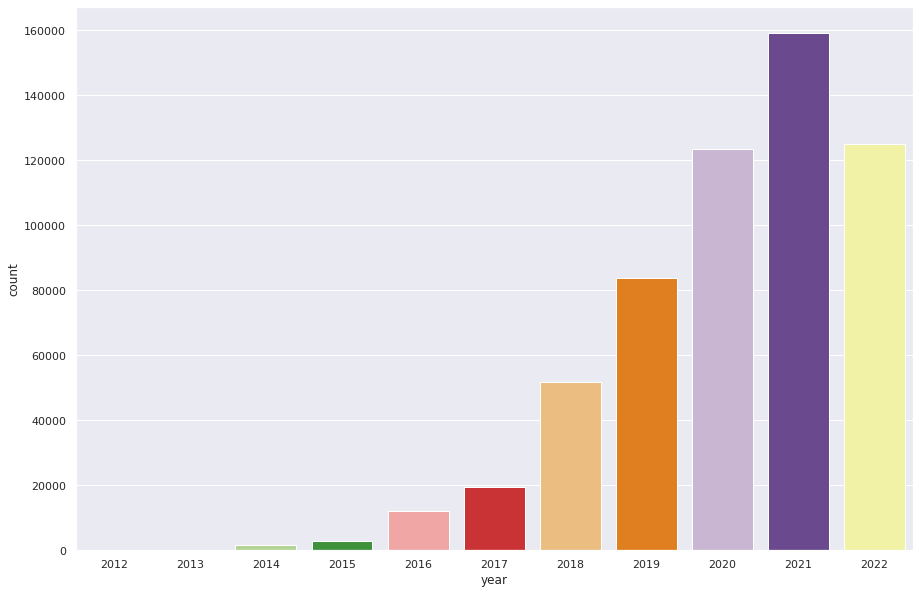

In [7]:
sns.countplot(
    data=data,
    x='year',
    palette="Paired",
);

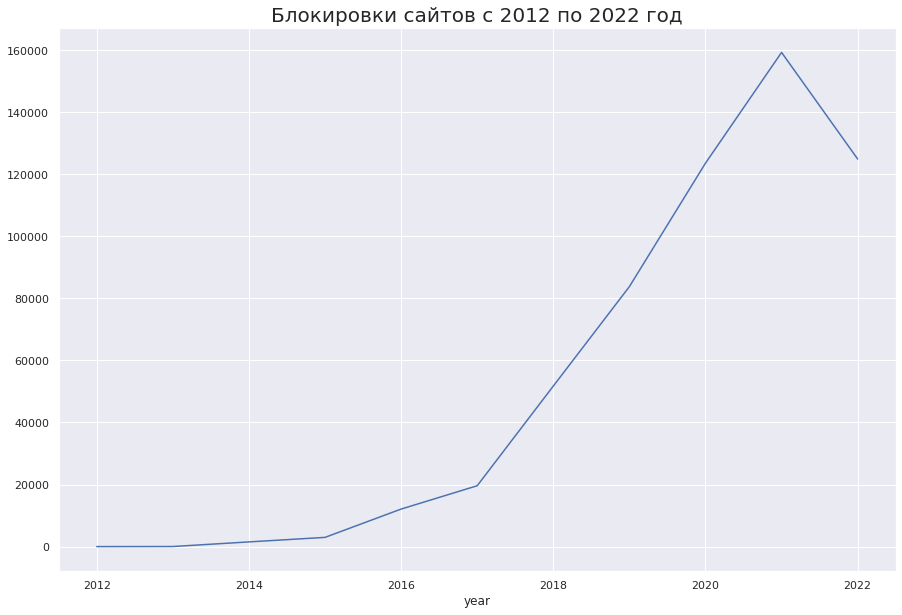

In [11]:
sns.lineplot(
    data=data.groupby('year').size(),
).set_title('Блокировки сайтов c 2012 по 2022 год', fontsize=20);

In [13]:
temp = data[(data.year >= 2018) & (data.month <= 6)].groupby(['year', 'month']).size().reset_index().sort_values(by=['year', 'month'], ascending=True)
temp.columns = ['year', 'month', 'count']

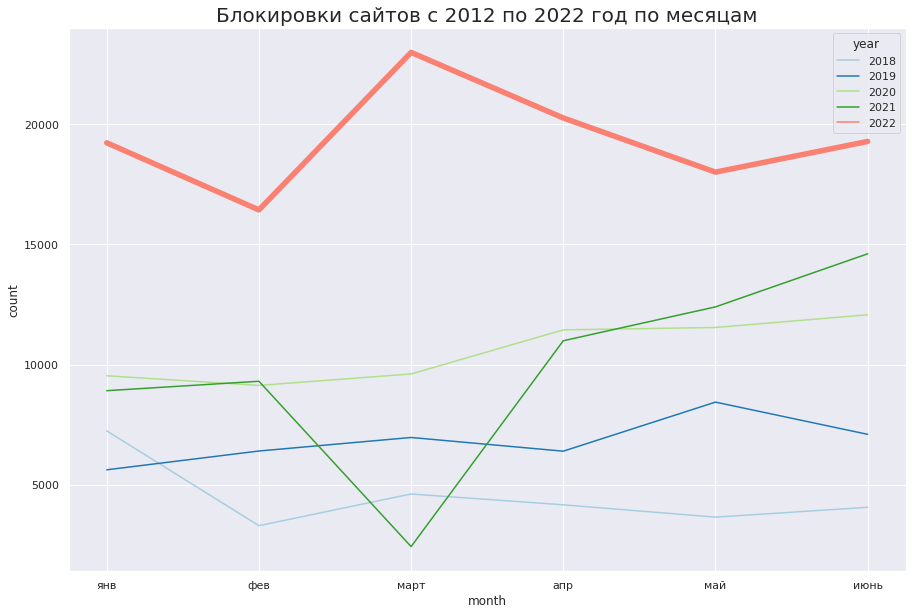

In [28]:
sns.lineplot(
    data=temp[temp.year!=2022],
    x='month',
    y='count',
    hue='year',
    palette="Paired",
)

sns.lineplot(
    data=temp[temp.year==2022],
    x='month',
    y='count',
    linewidth=5.5,
    hue='year',
    palette="dark:salmon_r",
).set_title('Блокировки сайтов c 2012 по 2022 год по месяцам', fontsize=20);

plt.xticks(range(1, 7), ['янв', 'фев', 'март', 'апр', 'май', 'июнь'])
plt.show()

In [153]:
# sns.lineplot(
#     data=temp,
#     x='month',
#     y='count',
#     hue='year',
#     palette="Paired"
# )

# plt.xticks(range(1, 7), ['янв', 'фев', 'март', 'апр', 'май', 'июнь'])
# plt.show()

In [15]:
data[data.year == 2022].groupby('who_blocked').size().sort_values(ascending=False).head(20)

who_blocked
ФНС                                                          39735
Мосгорсуд                                                    13667
Генпрокуратура                                               12362
Минкомсвязь                                                   6012
Роскомнадзор                                                  5523
МВД                                                           4913
Росздравнадзор                                                3591
Зареченский районный суд г.Тулы - Тульская область            3256
РАР                                                           1609
Куйбышевский районный суд г. Омска - Омская область            520
Ленинский районный суд г. Костромы - Костромская область       512
Ленинский районный суд г. Ижевска - Удмуртская Республика      427
Зеленоградский районный суд - Калининградская область          363
Центральный районный суд г. Барнаула - Алтайский край          312
Октябрьский районный суд г. Омска - Омская область

In [53]:
doubles_data = data[data.year == 2022].groupby('site').size().sort_values(ascending=False).reset_index()
doubles_data.columns.values[1] = 'count_of_blocks'

In [54]:
doubles_data

,site,count_of_blocks
0,stvolyguns.net,16
1,ohotostvoli.ru,14
2,guns-saler.ru,14
3,boevojben.net,12
4,onion.worldguns.net,12
...,...,...
89739,https://kazino-vegas-igrovyye-avtomaty-zerkalo...,1
89740,https://kazino-velkom-8.simkaa.ru/?p=3773,1
89741,https://kazino-vulkan-champion-novoye-zerkalo....,1
89742,b.kupit-spravku-rostov-na-donu.info,1


In [67]:
doubles_data[doubles_data.site.str.contains('mediazona')]

,site,count_of_blocks
30920,mediazona.online,1


In [66]:
doubles_data[doubles_data.count_of_blocks == 1].count()

site               59506
count_of_blocks    59506
dtype: int64